## Accessing GBIF data with the Planetary Computer STAC API

This notebook provides an example of accessing [Global Biodiversity Information Facility](https://planetarycomputer.microsoft.com/dataset/gbif) (GBIF) occurrence data from the Planetary Computer STAC API. Periodic snapshots of the data are stored in Parquet format.

In [1]:
import pystac_client
import planetary_computer

To access the data stored in Azure Blob Storage, we'll use the Planetary Computer's [STAC API](https://planetarycomputer.microsoft.com/api/stac/v1/docs). 

In [2]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
search = catalog.search(collections=["gbif"])
items = search.get_all_items()
items = {x.id: x for x in items}
list(items)

['gbif-2022-10-01',
 'gbif-2022-09-01',
 'gbif-2022-08-01',
 'gbif-2022-07-01',
 'gbif-2022-06-01',
 'gbif-2022-05-01',
 'gbif-2022-04-01',
 'gbif-2022-03-01',
 'gbif-2022-02-01',
 'gbif-2022-01-01',
 'gbif-2021-12-01',
 'gbif-2021-11-01',
 'gbif-2021-10-01',
 'gbif-2021-09-01',
 'gbif-2021-08-01',
 'gbif-2021-07-01',
 'gbif-2021-06-01',
 'gbif-2021-04-13']

https://sasweb.microsoft.com/Member/Silo/16477We'll take the most recent item.

In [4]:
item = list(items.values())[0]

We'll use [Dask](https://docs.dask.org/en/latest/) to read the partitioned Parquet Dataset.

In [10]:
import dask.dataframe as dd

asset = item.assets["data"]
df = dd.read_parquet(
    asset.href,
    storage_options=asset.extra_fields["table:storage_options"],
    parquet_file_extension=None,
    arrow_to_pandas=dict(timestamp_as_object=True),
)
df

,gbifid,datasetkey,occurrenceid,kingdom,phylum,class,order,family,genus,species,infraspecificepithet,taxonrank,scientificname,verbatimscientificname,verbatimscientificnameauthorship,countrycode,locality,stateprovince,occurrencestatus,individualcount,publishingorgkey,decimallatitude,decimallongitude,coordinateuncertaintyinmeters,coordinateprecision,elevation,elevationaccuracy,depth,depthaccuracy,eventdate,day,month,year,taxonkey,specieskey,basisofrecord,institutioncode,collectioncode,catalognumber,recordnumber,identifiedby,dateidentified,license,rightsholder,recordedby,typestatus,establishmentmeans,lastinterpreted,mediatype,issue
npartitions=1960,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int32,object,float64,float64,float64,float64,float64,float64,float64,float64,datetime64[ns],int32,int32,int32,int32,int32,object,object,object,object,object,object,datetime64[ns],object,object,object,object,object,datetime64[ns],object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


As indicated by `npartitions`, this Parquet dataset is made up of many individual parquet files. We can read in a specific partition with `.get_partition`

In [11]:
chunk = df.get_partition(0).compute()
chunk

,gbifid,datasetkey,occurrenceid,kingdom,phylum,class,order,family,genus,species,...,identifiedby,dateidentified,license,rightsholder,recordedby,typestatus,establishmentmeans,lastinterpreted,mediatype,issue
0,2141788029,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS590769735,Animalia,Chordata,Aves,Passeriformes,Polioptilidae,Polioptila,Polioptila caerulea,...,[],None,CC_BY_4_0,None,[{'array_element': 'obsr233099'}],[],None,2022-09-08 14:29:55.344000,[],[]
1,2142511629,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS591457037,Animalia,Chordata,Aves,Columbiformes,Columbidae,Patagioenas,Patagioenas cayennensis,...,[],None,CC_BY_4_0,None,[{'array_element': 'obsr767103'}],[],None,2022-09-08 14:29:56.715000,[],[{'array_element': 'COORDINATE_ROUNDED'}]
2,2126155116,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS592106103,Animalia,Chordata,Aves,Accipitriformes,Pandionidae,Pandion,Pandion haliaetus,...,[],None,CC_BY_4_0,None,[{'array_element': 'obsr370369'}],[],None,2022-09-08 14:29:58.118000,[],[]
3,2143587663,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS592831487,Animalia,Chordata,Aves,Passeriformes,Icteridae,Quiscalus,Quiscalus quiscula,...,[],None,CC_BY_4_0,None,[{'array_element': 'obsr29404'}],[],None,2022-09-08 14:29:59.965000,[],[]
4,2152055267,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS593603038,Animalia,Chordata,Aves,Passeriformes,Regulidae,Regulus,Regulus calendula,...,[],None,CC_BY_4_0,None,[{'array_element': 'obsr383648'}],[],None,2022-09-08 14:30:01.862000,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947843,1674906857,9e932f70-0c61-11dd-84ce-b8a03c50a862,urn:lsid:slu.aqua.rom.sers:ObservedProperty:14...,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Perca,Perca fluviatilis,...,[],None,CC0_1_0,None,[{'array_element': 'Fiskeriverkets utredningsk...,[],None,2022-09-25 05:23:40.367000,[],[{'array_element': 'COORDINATE_ROUNDED'}]
1947844,2012826837,9e932f70-0c61-11dd-84ce-b8a03c50a862,urn:lsid:slu.aqua.rom.sers:ObservedProperty:14...,Animalia,Arthropoda,Malacostraca,Decapoda,Astacidae,Astacus,Astacus astacus,...,[],None,CC0_1_0,None,[{'array_element': 'Fiskeriverkets utredningsk...,[],None,2022-09-25 05:23:40.367000,[],[{'array_element': 'COORDINATE_ROUNDED'}]
1947845,1674906890,9e932f70-0c61-11dd-84ce-b8a03c50a862,urn:lsid:slu.aqua.rom.sers:ObservedProperty:14...,Animalia,Chordata,Actinopterygii,Salmoniformes,Salmonidae,Salmo,Salmo trutta,...,[],None,CC0_1_0,None,[{'array_element': 'Fiskeriverkets utredningsk...,[],None,2022-09-25 05:23:40.367000,[],[{'array_element': 'COORDINATE_ROUNDED'}]
1947846,1675104176,9e932f70-0c61-11dd-84ce-b8a03c50a862,urn:lsid:slu.aqua.rom.sers:ObservedProperty:14...,Animalia,Chordata,Actinopterygii,Salmoniformes,Salmonidae,Thymallus,Thymallus thymallus,...,[],None,CC0_1_0,None,[{'array_element': 'Fiskeriverkets utredningsk...,[],None,2022-09-25 05:23:40.367000,[],[{'array_element': 'COORDINATE_ROUNDED'}]


To get a sense for the most commonly observed species, we'll group the dataset and get the count of each species.

In [12]:
chunk.groupby(["kingdom", "phylum", "class", "family", "genus"])[
    "species"
].value_counts().sort_values(ascending=False).head(15)

kingdom   phylum    class           family        genus       species              
Animalia  Chordata  Actinopterygii  Salmonidae    Salmo       Salmo trutta             36867
                                    Cyprinidae    Phoxinus    Phoxinus phoxinus        16818
                    Aves            Sturnidae     Sturnus     Sturnus vulgaris         12594
                    Actinopterygii  Salmonidae    Salmo       Salmo salar              12313
                    Aves            Passeridae    Passer      Passer domesticus        12047
                                    Turdidae      Turdus      Turdus migratorius       12024
                                    Corvidae      Corvus      Corvus brachyrhynchos    11941
                    Actinopterygii  Cottidae      Cottus      Cottus gobio             11923
                    Aves            Columbidae    Zenaida     Zenaida macroura         11370
                    Actinopterygii  Lotidae       Lota        Lota lota        

Let's create a map with the number of unique species per country. First, we'll group by country code and compute the number of unique species (per country).

In [13]:
species_per_country = chunk.groupby("countrycode").species.nunique()
species_per_country

countrycode
AD      4
AE    208
AF     10
AG     18
AI     11
     ... 
YT      1
ZA    482
ZM    111
ZW    117
ZZ     15
Name: species, Length: 239, dtype: int64

Finally, we can plot the counts on a map using geopandas, by joining `species_per_country` to a dataset with country boundaries.

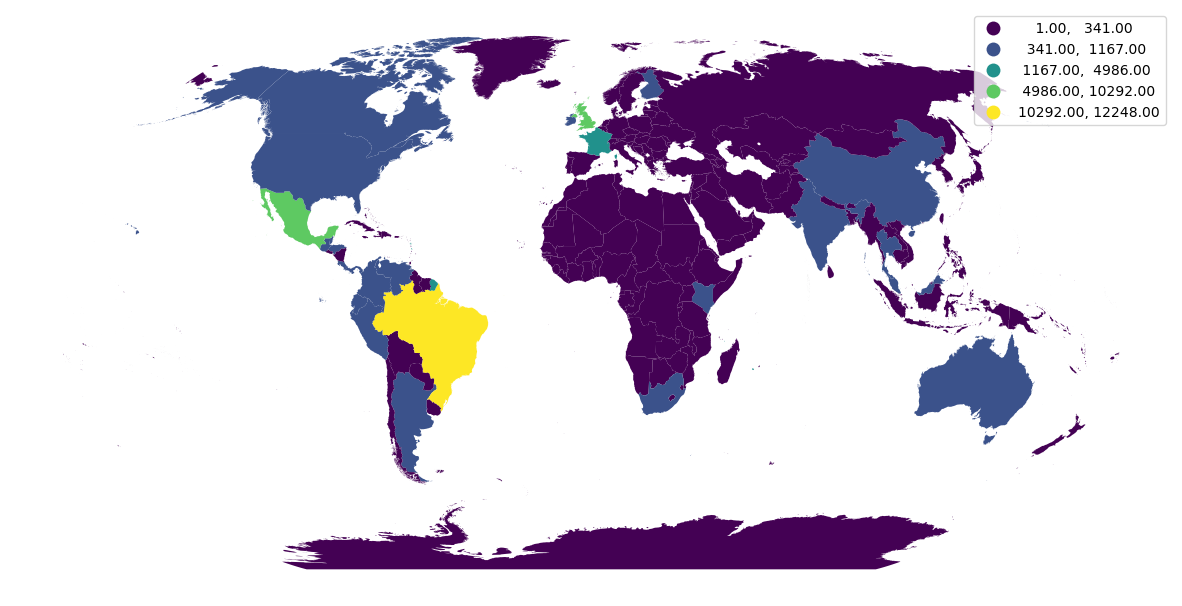

In [14]:
import geopandas
import cartopy

countries = geopandas.read_file(
    "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
)
gdf = geopandas.GeoDataFrame(
    countries.merge(species_per_country, left_on="ISO_A2", right_index=True)
)
crs = cartopy.crs.Robinson()
ax = gdf.to_crs(crs.proj4_init).plot(
    column="species", legend=True, scheme="natural_breaks", k=5, figsize=(15, 15)
)
ax.set_axis_off()

### Working with the full dataset

Thus far, we've just used a single partition from the full GBIF dataset. All of the examples shown in this notebook work on the entire dataset using `dask.dataframe` to read in the Parquet dataset.

You might want create a cluster to process the data in parallel on many machines.

```python
from dask_gateway import GatewayCluster

cluster = GatewayCluster()
cluster.scale(16)
client = cluster.get_client()
```

Then use `dask.dataframe.read_parquet` to read in the files. To speed things up even more, we'll specify a subset of files to read in.

```python
df = dd.read_parquet(
    signed_asset.href,
    columns=["countrycode", "species"],
    storage_options=signed_asset.extra_fields["table:storage_options"],
)
```

Now you can repeat the computations above, replacing `chunk` with `df`.

### Next Steps

Now that you've an introduction to the Forest Inventory and Analysis dataset, learn more with

* The [Reading tabular data quickstart](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-tabular-data/) for an introduction to tabular data on the Planeatry Computer
* [Scale with Dask](https://planetarycomputer.microsoft.com/docs/quickstarts/scale-with-dask/) for more on using Dask to work with large datasets